<a href="https://colab.research.google.com/github/yonseimath/data-science-2022-biginner/blob/feature%2Fjeahyuk/jeahyuk/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_4_1_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 준비

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] ='leejeahyuk'
os.environ['KAGGLE_KEY'] ='909dc28f843ffc03b80b5291757fd8f0'

In [ ]:
!kaggle datasets download -d aungpyaeap/fish-market
!unzip '*.zip'

  0% 0.00/2.39k [00:00<?, ?B/s]
100% 2.39k/2.39k [00:00<00:00, 1.70MB/s]
Archive:  fish-market.zip
  inflating: Fish.csv                


In [ ]:
!ls

Fish.csv  fish-market.zip  sample_data


In [ ]:
df = pd.read_csv('Fish.csv')

In [ ]:
y=df['Species']
X=df.drop(['Species'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 로지스틱 회귀

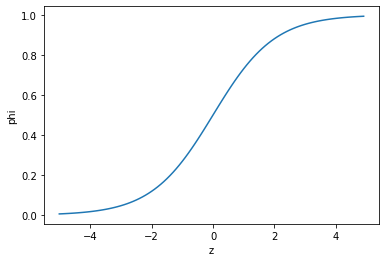

In [ ]:
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99793528 0.00206472]
 [0.02390293 0.97609707]
 [0.99575366 0.00424634]
 [0.98765044 0.01234956]
 [0.9980632  0.0019368 ]]


In [ ]:
print(lr.coef_, lr.intercept_)
#계수 확인

[[-0.36707083 -0.50388475 -0.52530414 -0.60537206 -0.92906093 -0.66884746]] [-2.35565567]


In [ ]:
# z값 출력 메서드
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.18069141  3.70956106 -5.45744326 -4.38170875 -6.24478056]


In [ ]:
from scipy.special import expit

print(expit(decisions))

[0.00206472 0.97609707 0.00424634 0.01234956 0.0019368 ]


In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9411764705882353
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.838 0.    0.138 0.007 0.003]
 [0.    0.002 0.042 0.    0.006 0.95  0.   ]
 [0.    0.    0.029 0.937 0.01  0.024 0.   ]
 [0.012 0.034 0.27  0.004 0.596 0.    0.084]
 [0.    0.    0.906 0.002 0.088 0.003 0.001]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 6) (7,)


In [ ]:
X

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
